### <font color = "maroon"> 1. Import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore

%matplotlib inline 

### <font color = "maroon"> 2. Read dataset

In [2]:
pdata = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
pdata.shape

(768, 9)

* The dataset has a dimension of <b>768 rows</b> and <b>9 columns</b>

### <font color = "maroon">3. Eyeballing dataset

In [4]:
# View first 10 rows of dataset
pdata.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Check total number of NA rows
pdata.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
# Check the 5 values for each columns
pdata.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


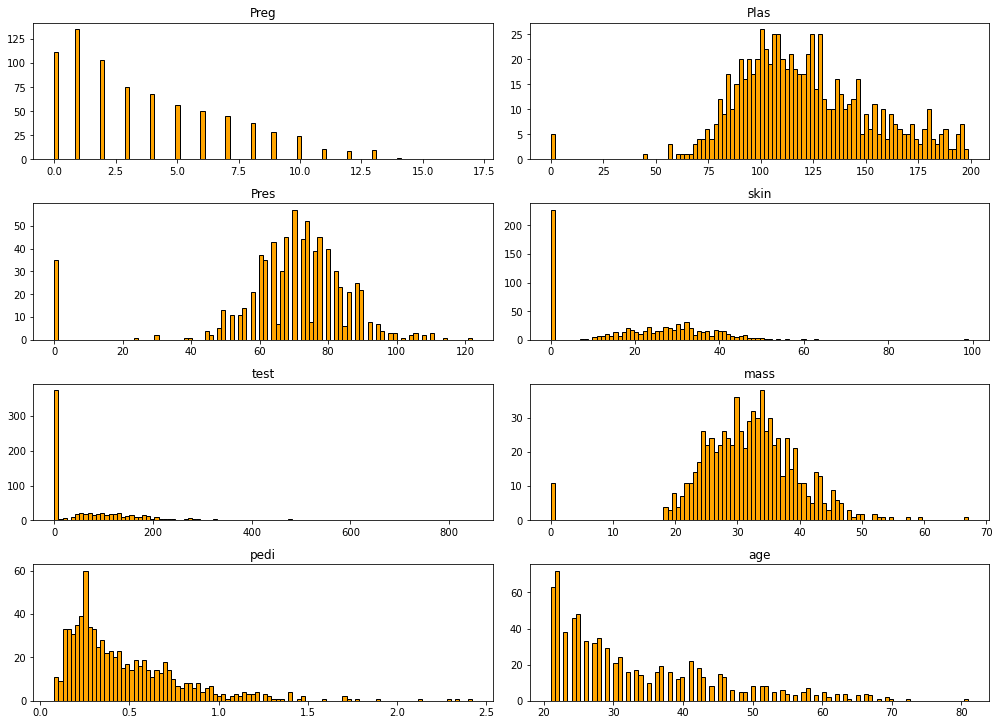

In [7]:
# Study the distribution of data
columns = list(pdata)[0:-1] # Excluding Outcome column 
pdata[columns].hist(stacked=False, 
                    bins=100, 
                    figsize=(14,35), 
                    layout=(14,2), 
                    color = 'orange', 
                    edgecolor = 'black', 
                    grid = False)
plt.tight_layout()

### <font color = "maroon"> 4. Check the correlation between attributes

In [8]:
pdata.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


[Text(0, 0.5, 'Preg'),
 Text(0, 1.5, 'Plas'),
 Text(0, 2.5, 'Pres'),
 Text(0, 3.5, 'skin'),
 Text(0, 4.5, 'test'),
 Text(0, 5.5, 'mass'),
 Text(0, 6.5, 'pedi'),
 Text(0, 7.5, 'age'),
 Text(0, 8.5, 'class')]

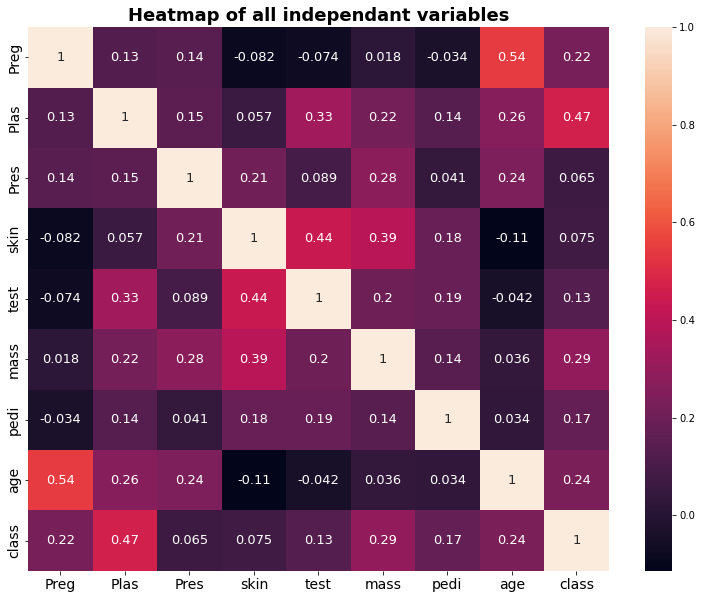

In [9]:
fig = plt.figure(figsize = (13, 10)) 
ax = sns.heatmap(pdata.corr(), annot = True, annot_kws={"fontsize":13})
plt.title('Heatmap of all independant variables', fontsize = 18, fontweight = 'bold')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)

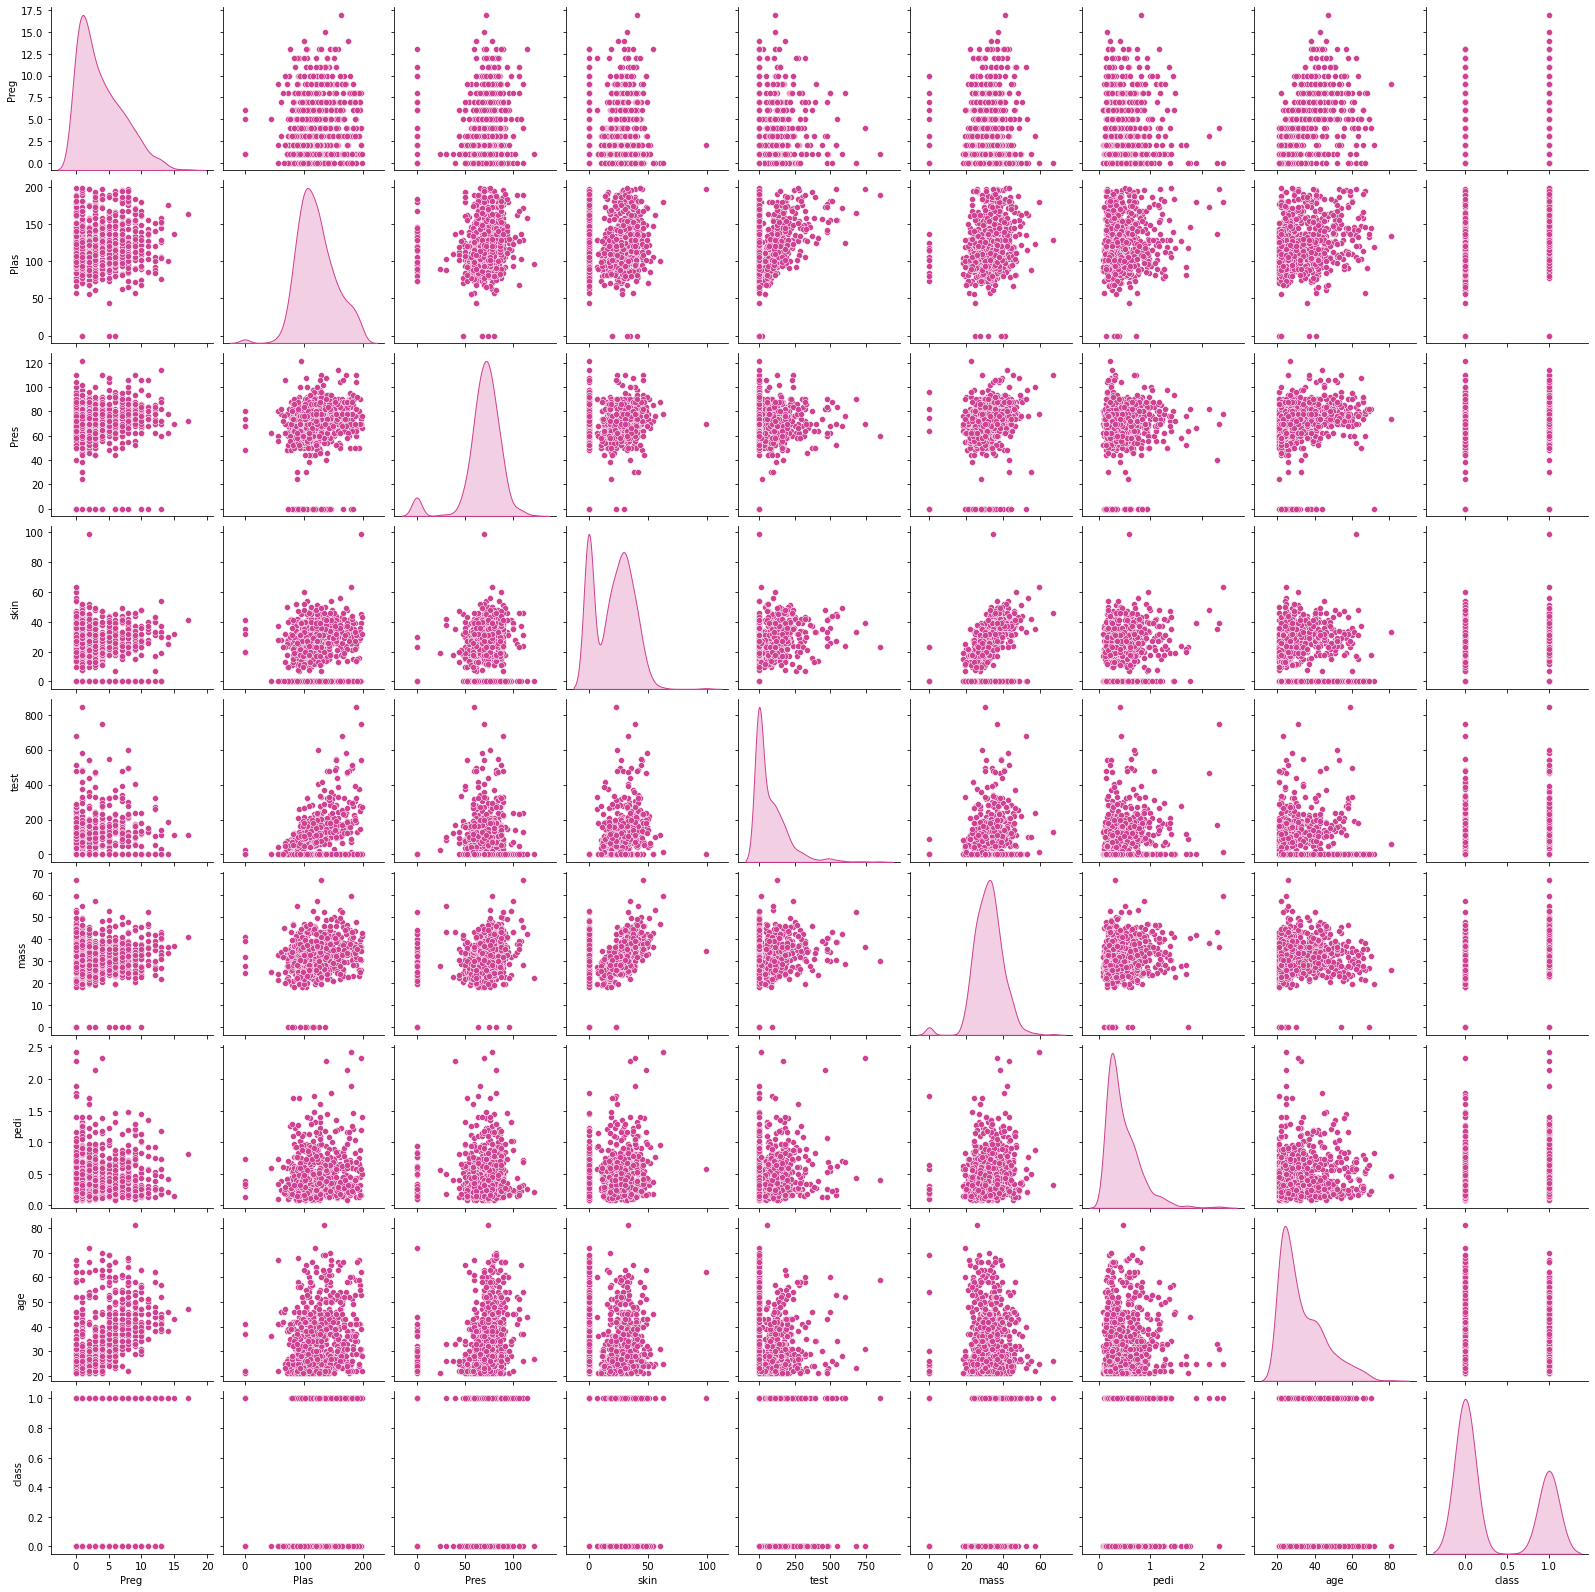

In [10]:
sns.set_palette("PiYG")
sns.pairplot(pdata,diag_kind='kde')

### <font color = "maroon"> 5.Impute the missing values with mean

In [11]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['Plas','Pres','skin','test','mass','pedi']
imputer = rep_0.fit(pdata[cols])
pdata[cols] = imputer.transform(pdata[cols])



pdata.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


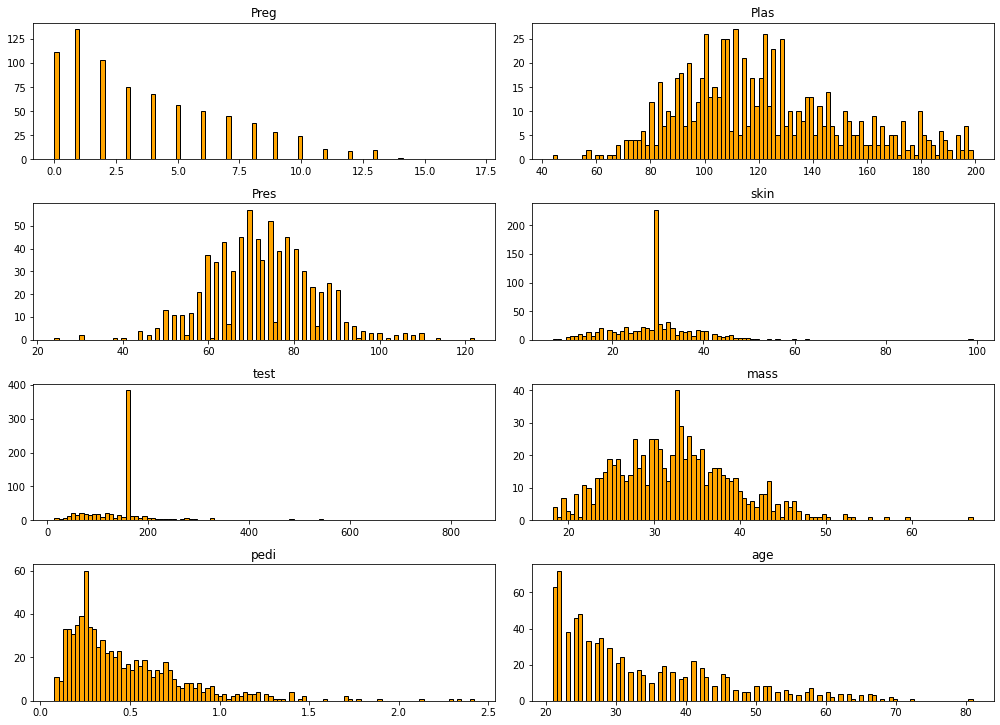

In [12]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only 
pdata[columns].hist(stacked=False, 
                    bins=100, 
                    figsize=(14,35), 
                    layout=(14,2), 
                    color = 'orange', 
                    edgecolor = 'black', 
                    grid = False)
plt.tight_layout()

In [13]:
pdata.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### <font color = "maroon"> 6. Split dataset into training and testing set (70:30)

In [14]:
X = pdata.drop('class',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136.0,70.0,32.0,110.000000,37.1,0.153,43
467,0,97.0,64.0,36.0,100.000000,36.8,0.600,25
550,1,116.0,70.0,28.0,155.548223,27.4,0.204,21
147,2,106.0,64.0,35.0,119.000000,30.5,1.400,34
481,0,123.0,88.0,37.0,155.548223,35.2,0.197,29


### <font color = "maroon"> 7. Use train dataset to train the logistic regression model

In [15]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1       2         3         4         5         6  \
0  0.093219  0.026444 -0.0275 -0.012876 -0.000161  0.075996  0.353518   

          7  intercept  
0  0.013513  -4.992911  


### <font color = "maroon"> 8. Evaluate performance of model using confusion matrix

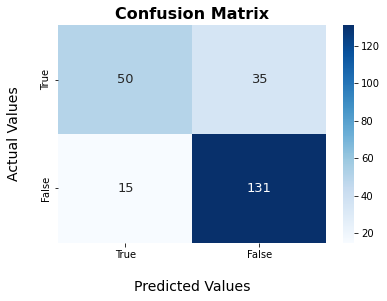

In [16]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt = 'g', annot_kws = {"fontsize":13})

ax.set_title('Confusion Matrix', fontsize = 16, fontweight = 'bold');
ax.set_xlabel('\nPredicted Values', fontsize = 14)
ax.set_ylabel('Actual Values\n', fontsize = 14);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [17]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7835497835497836


### <font color = "maroon"> 9. Retrain model with normalization

In [33]:
pdata

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [80]:
norm_pdata = pdata.copy()

In [35]:
norm_pdata

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


### <font color = "maroon"> 10. Transform dataset using z-score transformation

In [81]:
def z_score_norm(df, cols):
    for col in cols:
        df[col] = zscore(df[col])

In [82]:
pdata.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
columns = list(pdata)[0:-1]
z_score_norm(norm_pdata, columns)

In [84]:
norm_pdata.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,0.639947,0.865108,-3.351824e-02,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-5.298590e-01,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-6.953060e-01,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-5.298590e-01,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669e+00,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
5,0.342981,-0.186965,1.319287e-01,8.087936e-16,-3.345079e-16,-0.998077,-0.818079,-0.275760,0
6,-0.250952,-1.436303,-1.853434e+00,3.240194e-01,-7.950054e-01,-0.212128,-0.676133,-0.616111,1
7,1.827813,-0.219843,1.175571e-15,8.087936e-16,-3.345079e-16,0.413720,-1.020427,-0.360847,0
8,-0.547919,2.476096,-1.989652e-01,1.803778e+00,4.560094e+00,-0.284901,-0.947944,1.681259,1
9,1.233880,0.108930,1.951845e+00,8.087936e-16,-3.345079e-16,0.000000,-0.724455,1.766346,1


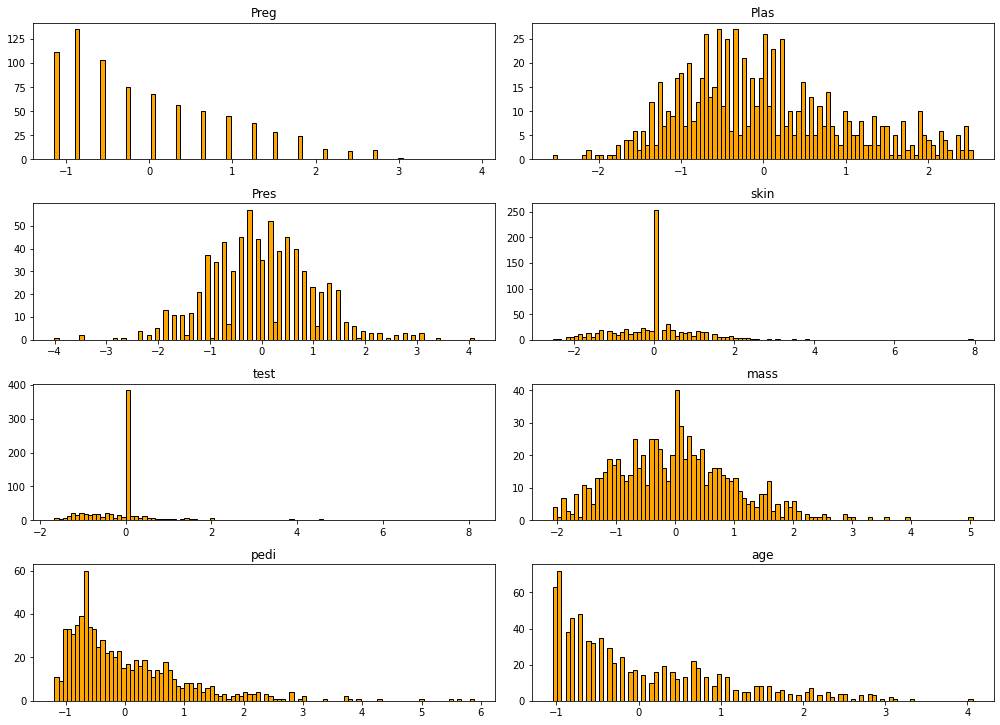

In [45]:
columns = list(norm_pdata)[0:-1] # Excluding Outcome column which has only 
norm_pdata[columns].hist(stacked=False, 
                    bins=100, 
                    figsize=(14,35), 
                    layout=(14,2), 
                    color = 'orange', 
                    edgecolor = 'black', 
                    grid = False)
plt.tight_layout()

In [46]:
X = norm_pdata.drop('class',axis=1)     # Predictor feature columns (8 X m)
Y = norm_pdata['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,3.312645,0.470581,-0.198965,0.324019,-5.360775e-01,0.675703,-0.963044,0.830381
467,-1.141852,-0.811634,-0.695306,0.779330,-6.537720e-01,0.632039,0.386949,-0.701198
550,-0.844885,-0.186965,-0.198965,-0.131291,-3.345079e-16,-0.736094,-0.809018,-1.041549
147,-0.547919,-0.515738,-0.695306,0.665502,-4.301525e-01,-0.284901,2.803044,0.064591
481,-1.141852,0.043176,1.290057,0.893157,-3.345079e-16,0.399166,-0.830159,-0.360847


In [47]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

        0        1         2         3         4         5         6  \
0  0.3145  0.99158 -0.131227 -0.057307 -0.026733  0.710712  0.185282   

          7  intercept  
0  0.229684  -0.842614  


In [48]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7835497835497836
